# Algorithmes de tri

Nous avons vu dans le chapitre sur les listes que la méthode <code>sort</code> permet d'effectuer un tri. Par défault, cette méthode trie la liste dans l'ordre croissant. Pour trier une liste dans l'ordre décroissant, il faut spécifier <code>reverse=True</code>. 

In [1]:
a = [1, 3, 5, 2, 5, 3, 0, 4]
print(a)
# tri et affichage de la liste
a.sort()
print(a)

[1, 3, 5, 2, 5, 3, 0, 4]
[0, 1, 2, 3, 3, 4, 5, 5]


In [2]:
# tri decroissant 
a.sort(reverse=True)
print(a)

[5, 5, 4, 3, 3, 2, 1, 0]


Derrière cette méthode <code>sort</code> se trouve un algorithme qui permet de trier la liste. Il existe de nombreux algorithmes pour trier une liste. L'algorithme le plus simple à comprendre (et le moins efficace) est l'algorithme de tri à bulles. 

## Le tri à bulles

Le tri à bulles fonctionne de la façon suivante. Chaque élément est comparé par rapport au prochain élément. Si l'élément de gauche est plus grand que l'élément de droite, alors il y a une inversion. Ce processus est répété autant de fois qu'il n'y a d'éléments dans la liste. 

La vidéo ci-dessous reprend une explication non-technique du fonctionnement du tri à bulles. 

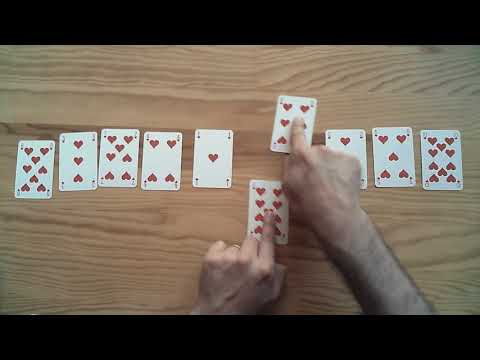

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('LTN97u8rSY0', width=750, height=300)

### Le tri à bulles *from scratch*

In [4]:
a = [1, 3, 5, 2, 5, 3, 0, 4]
n = len(a)
compteur = 0 
print('Before sorting')
print(a)
for i in range(n-1):
    for j in range(n-1):
        if a[j] > a[j+1]:
            a[j], a[j+1] = a[j+1], a[j]
        compteur += 1 

print('After sorting')
print(a)
print(compteur)

Before sorting
[1, 3, 5, 2, 5, 3, 0, 4]
After sorting
[0, 1, 2, 3, 3, 4, 5, 5]
49


Pour analyser la performance de ce script, nous avons également initialisé une variable <code>compteur</code> qui augmente de 1 à chaque fois qu'on teste s'il faut ou non échanger les 2 éléments. On constate qu'il y a 49 tests. Ceci correspond en fait à $(n-1)^2$ itérations, sachant qu'il y a $n$ éléments dans la liste. On dit que l'algorithme a une complexité en $\mathcal{O}(n^2)$. 

#### Amélioration v1

Il est toutefois possible d'assez facilement améliorer ce script. En effet, après chaque itération complète (à chaque fois qu'on a parcouru entièrement la liste), il y a 1 élément qui est à la bonne place. Il n'est donc pas nécessaire de tester la position des éléments à la fin de la liste. Concrètement, on peut donc remplacer <code>for j in range(n-1)</code> par <code>for j in range(n-i-1)</code>. Suite à cette modification, on constate que le nombre d'itérations passe à 28, ce qui dans cet exemple, permet de réduire de moitié le nombre de calculs effectués. Ce nombre va cependant dépendre de l'état initial de la liste. 

In [5]:
a = [1, 3, 5, 2, 5, 3, 0, 4]
n = len(a)
compteur = 0 
print('Before sorting')
print(a)
for i in range(n):
    for j in range(n-i-1):
        if a[j] > a[j+1]:
            a[j], a[j+1] = a[j+1], a[j]
        compteur += 1 

print('After sorting')
print(a)
print(compteur)

Before sorting
[1, 3, 5, 2, 5, 3, 0, 4]
After sorting
[0, 1, 2, 3, 3, 4, 5, 5]
28


#### Amélioration v2

Une deuxième amélioration consiste à tester s'il y a eu au moins un changement lors d'une itération complète. Si ce n'est pas le cas, cela veut dire que la liste est déjà triée, et qu'il est donc inutile d'aller plus loin. Dans ce cas, on peut arrêter la boucle. 

In [6]:
a = [1, 3, 5, 2, 5, 3, 0, 4]
n = len(a)
compteur = 0 
print('Before sorting')
print(a)
for i in range(n):
    inversion = False 
    for j in range(n-i-1):
        if a[j] > a[j+1]:
            a[j], a[j+1] = a[j+1], a[j]
            inversion = True
        compteur += 1 
    if inversion == False:
        break

print('After sorting')
print(a)
print(compteur)

Before sorting
[1, 3, 5, 2, 5, 3, 0, 4]
After sorting
[0, 1, 2, 3, 3, 4, 5, 5]
28


Comme on peut le constater, le script a également eu besoin de 28 itérations avant d'avoir fini de trier la liste. Ceci est toutefois dû à la position particulière du 0, qui se trouve en avant-dernière position de la liste. Voyons ce qu'il se passe si on change l'ordre des chiffres. 

In [7]:
# v1 
a = [1, 0, 5, 2, 5, 3, 3, 4]
n = len(a)
compteur = 0 
print('Before sorting')
print(a)
for i in range(n):
    for j in range(n-i-1):
        if a[j] > a[j+1]:
            a[j], a[j+1] = a[j+1], a[j]
        compteur += 1 

print('After sorting')
print(a)
print(compteur)

Before sorting
[1, 0, 5, 2, 5, 3, 3, 4]
After sorting
[0, 1, 2, 3, 3, 4, 5, 5]
28


In [8]:
# v2 
a = [1, 0, 5, 2, 5, 3, 3, 4]
n = len(a)
compteur = 0 
print('Before sorting')
print(a)
for i in range(n):
    inversion = False 
    for j in range(n-i-1):
        if a[j] > a[j+1]:
            a[j], a[j+1] = a[j+1], a[j]
            inversion = True
        compteur += 1 
    if inversion == False:
        break

print('After sorting')
print(a)
print(compteur)

Before sorting
[1, 0, 5, 2, 5, 3, 3, 4]
After sorting
[0, 1, 2, 3, 3, 4, 5, 5]
18
